# Laboratory Session 2
Alessandro Fella 2024285

In [10]:
library(ggplot2)
library(cowplot)
library(hrbrthemes)
library('GoFKernel') 

# ***Exe01***

In [2]:
p_1 <- c(0.15, 0.21,0.35,0.15,0.14)
p_2 <- c(0.14,0.05,0.64,0.08,0.09)
x <- c(15.58,15.9,16,16.1,16.2)

#expected values
ex_value<- function(x,p){
    sum(x*p)/sum(p)
}
#variance
var <- function (x,p){
    med<-ex_value(x,p)
    sum(p*(x-med)**2)/(sum(p))
}
# Evaluate the expected values, E[X], and the variance, V ar(X), for both methods
print(paste0("The expected value using the first method is ",ex_value(x,p_1)," with a variance of ",var(x,p_1)))
print(paste0("The expected value using the second method is ",ex_value(x,p_2)," with a variance of ",var(x,p_2)))


[1] "The expected value using the first method is 15.959 with a variance of 0.033979"
[1] "The expected value using the second method is 15.9622 with a variance of 0.02816716"


# ***Exe02***

[1] "The theoretical average waiting time is 30 minutes "
[1] "The empirical average waiting time is 31.6455976729651 minutes "


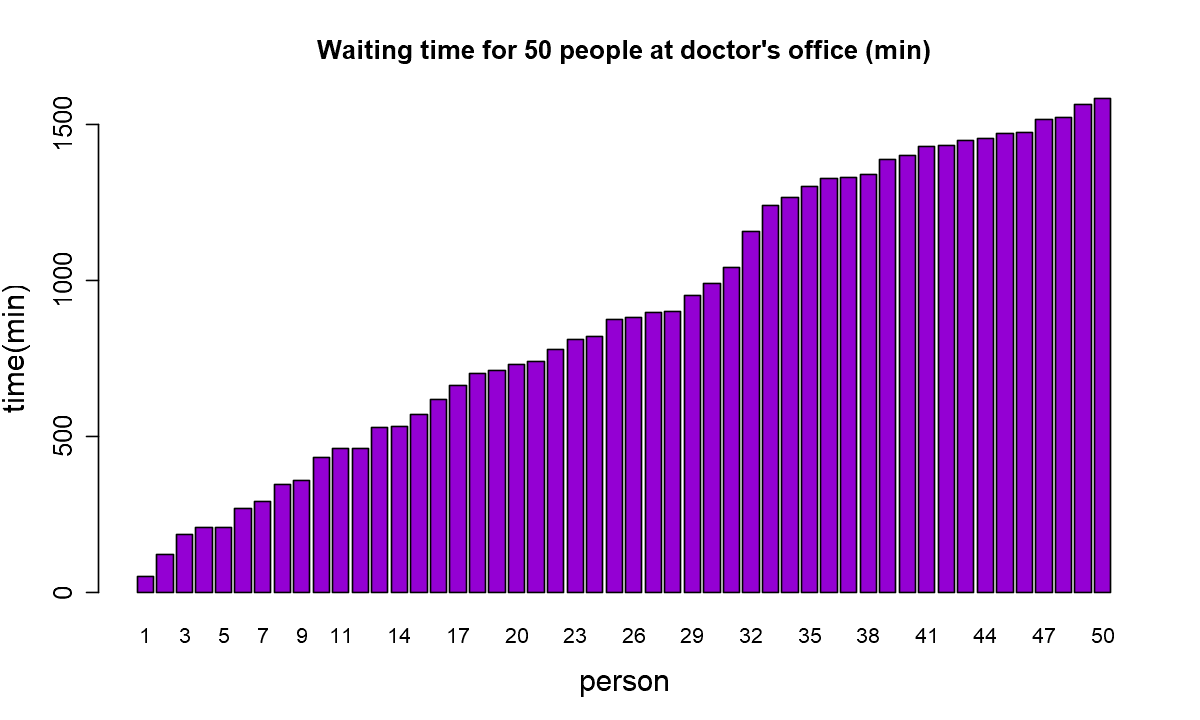

In [3]:
# A) simulate the waiting time for 50 people at the doctor’s office and plot the relative
# histogram
lambda<-1/30 #mu=30 min ==> [lambda]=(min)^(-1)
x<-1:50
ap<-rexp(50,lambda)
options(repr.plot.width=10, repr.plot.height=6)
barplot(cumsum(ap),names=x, col="darkviolet", xlab="person", ylab="time(min)",
        main=sprintf("Waiting time for 50 people at doctor's office (min)"),
        cex.lab=1.5, cex.axis=1.25, cex.main=1.25, cex.sub=1.5)

#C) evaluate the average waiting time from the simulated data and compare it with
# the expected value (calculated from theory and by manipulating the probability
# distributions using R)
print(paste0("The theoretical average waiting time is ",30, " minutes "))
print(paste0("The empirical average waiting time is ",mean(ap), " minutes "))

In [4]:
xValue <- seq(0, 150, 0.5)
yValue <- pexp(xValue,lambda)
data <- data.frame(xValue,yValue)


#B) and D) 
print(paste0("what is the probability that a person will wait for less than 10 minutes?  ",pexp(10,lambda)))
print(paste0("what is the probability for waiting more than one hour before being received ?  ", 1-pexp(60,lambda)))


[1] "what is the probability that a person will wait for less than 10 minutes?  0.283468689426211"
[1] "what is the probability for waiting more than one hour before being received ?  0.135335283236613"


# ***Exe03***

[1] "The probability of having ONE or more errors in a page is in the upper tail of the cdf  0.199148273471456"


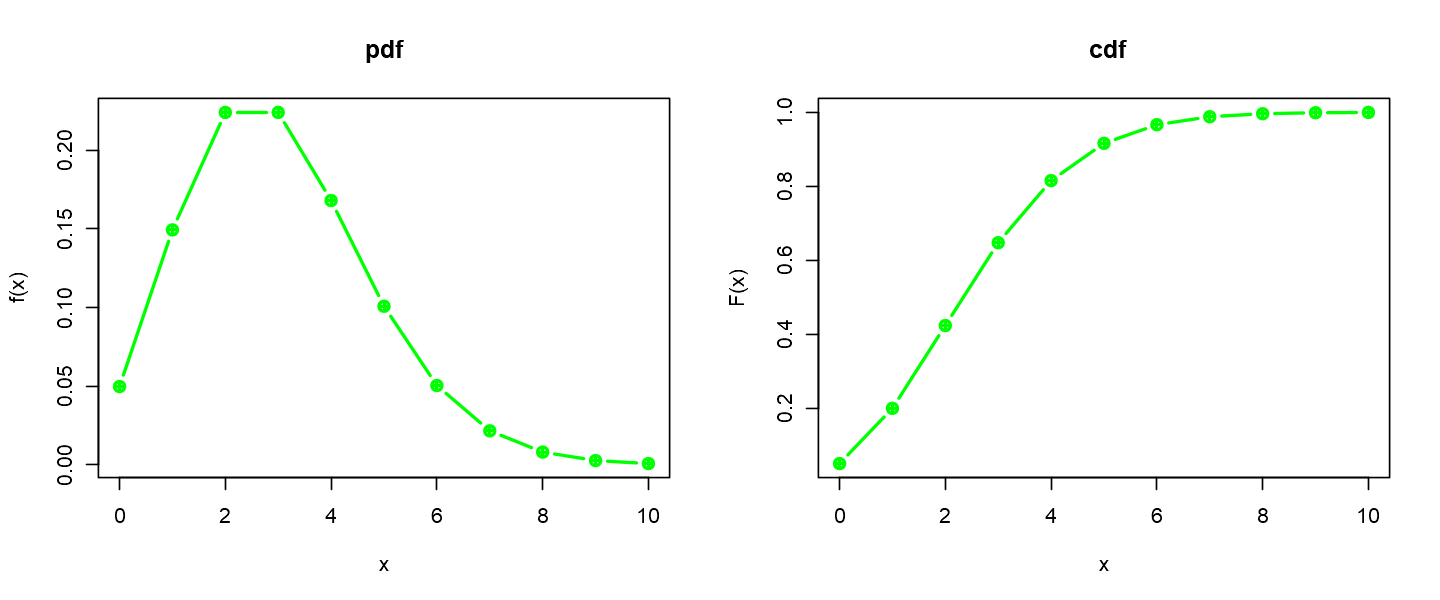

In [5]:
x<-seq(0, 10, 1)
lambda<-3
p<-dpois(x, lambda)
cum_p_x<-ppois(x, lambda, lower.tail = TRUE)
options(repr.plot.width=12, repr.plot.height=5)

par(mfrow=c(1,2))
plot(x,p, main="pdf",type="b", col="green", lwd=2, pch=10, xlab="x", ylab="f(x)")
plot(x,cum_p_x,type="b", col="green", lwd=2, pch=10, main=" cdf",xlab="x", ylab="F(x)")


print(paste0("The probability of having ONE or more errors in a page is in the upper tail of the cdf  ", ppois(1, lambda)))



# ***Exe04***

In [6]:
#  we randomly draw cards from a deck of 52 cards, with replacement, until one ace is
# drawn. Calculate the probability that at least 10 draws are needed.
deck=52 
right=4/deck
print(paste0("Probability that at least 10 draws are needed ", (1-right)**10))


[1] "Probability that at least 10 draws are needed 0.449137107141864"


# ***Exe05***

[1] "The result of the considered integral is : 0.166666666666667"
[1] "The constant c is equal to 6"
[1] "Probability that the student will finish the aptitude test in more then 75 min = 0.93925"
[1] "Probability of taking between 90 and 120 minutes = 0.5"


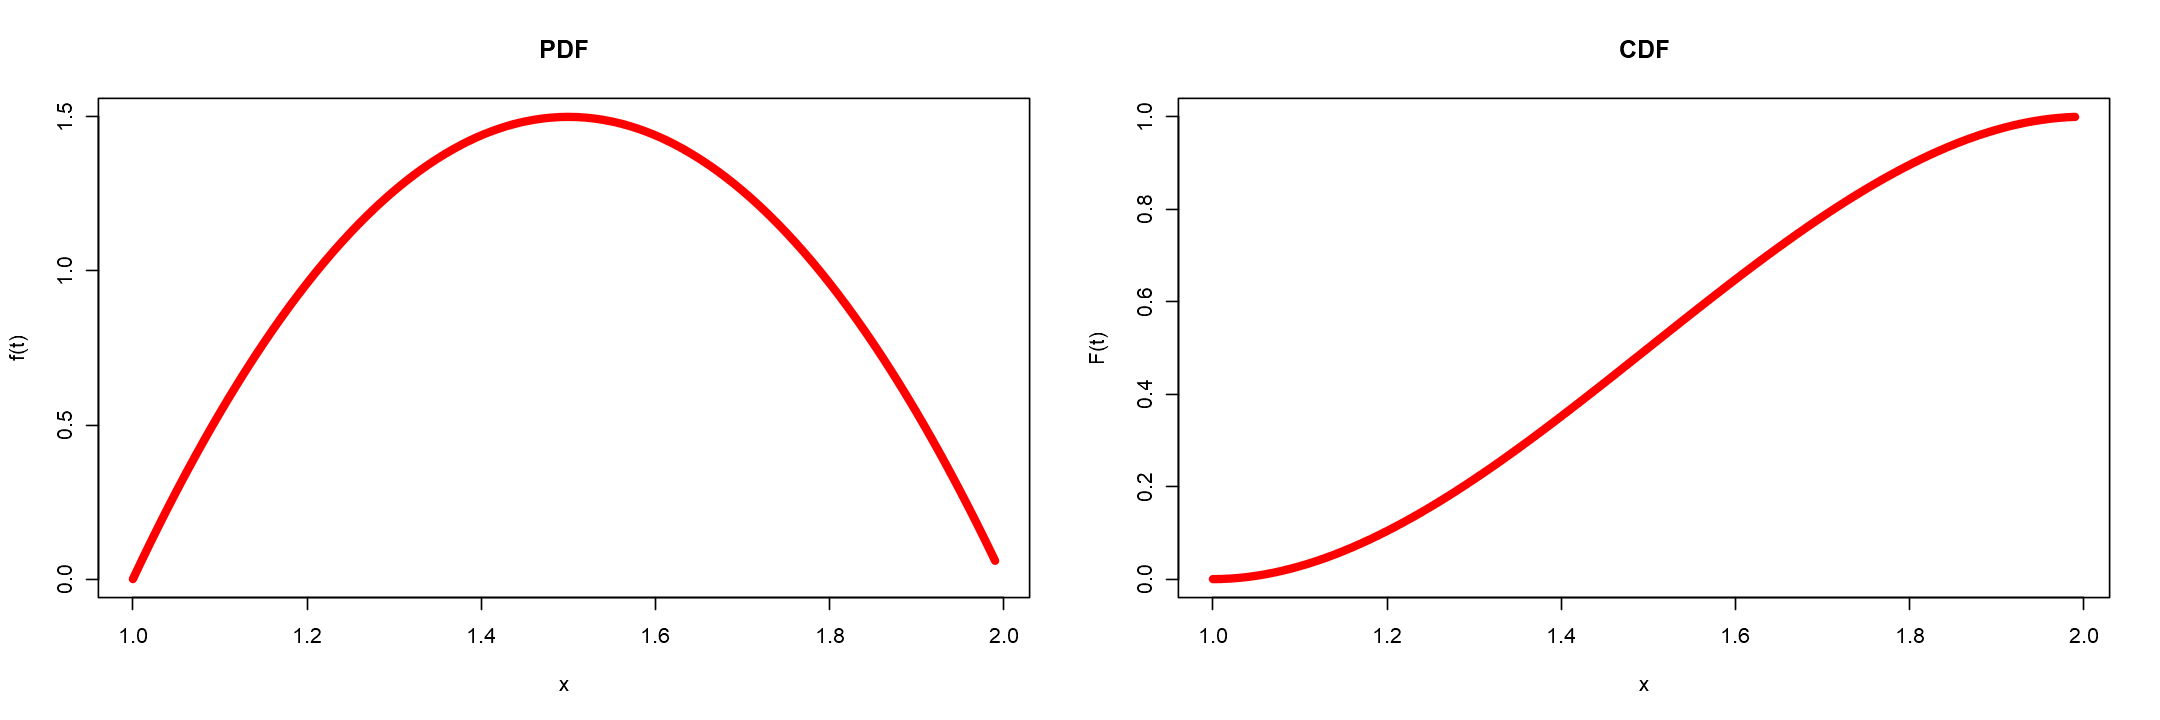

In [7]:
options(repr.plot.width=18, repr.plot.height=6);par(mfrow=c(1,2))
a=1;b=1.99;n=0.01
#a) using the integrate() R function, determine the constant c
func <- Vectorize(function(t){(t < 1)*(0)+(1 <t & t < 2)*((t − 1)*(2 − t))+(t>2)*(0)})
I_1 = integrate(func, 1, 2)[[1]]# Integral of Initial Function
print(paste0("The result of the considered integral is : ",I_1))
print(paste0("The constant c is equal to ",1/I_1))


# b) write the set of four R functions and plot the pdf and cdf, respectively
# PDF
pdf<- Vectorize(function(t){(t < 1)*(0)+(1 < t & t< 2)*((1/I_1)*(t − 1)*(2 − t))+(t>2)*(0)})
p1<-plot(seq(a,b,n),pdf(seq(a,b,n)), type = "l", col = "red",lwd = 5,xlab ="x", ylab = "f(t)", main = "PDF")

# CUMULATIVE
cfunc <- Vectorize( function(x){
         if(x<=1){ return(0) }
         if(x>=2){ return(1) }
         else {
             X <- integrate(pdf,1,x)$value
             return(X) }
         } )
p2<-plot(seq(a,b,n),cfunc(seq(a,b,n)), type = "l", col = "red",lwd = 5,xlab ="x", ylab = "F(t)", main = "CDF")



#QUANTILE FUNCTION
qfunc <- Vectorize( inverse(cfunc,lower=1,upper=2) )# #SAMPLING FROM THE DISTRIBUTION

#SAMPLING FROM THE DISTRIBUTION
sfunc<-function(n){
    x_seq<-seq(0.5,50,0.0001)
    sample(x=x_seq, size=n, prob = pdf(x_seq))}

#c) evaluate the probability that the student will finish the aptitude test in more than
# 75 minutes. And that it will take 90 and 120 minutes.


print(paste0("Probability that the student will finish the aptitude test in more then 75 min = ",1 -cfunc(1.15)))
print(paste0("Probability of taking between 90 and 120 minutes = ", 1-cfunc(1.5)))



# ***Exe06***

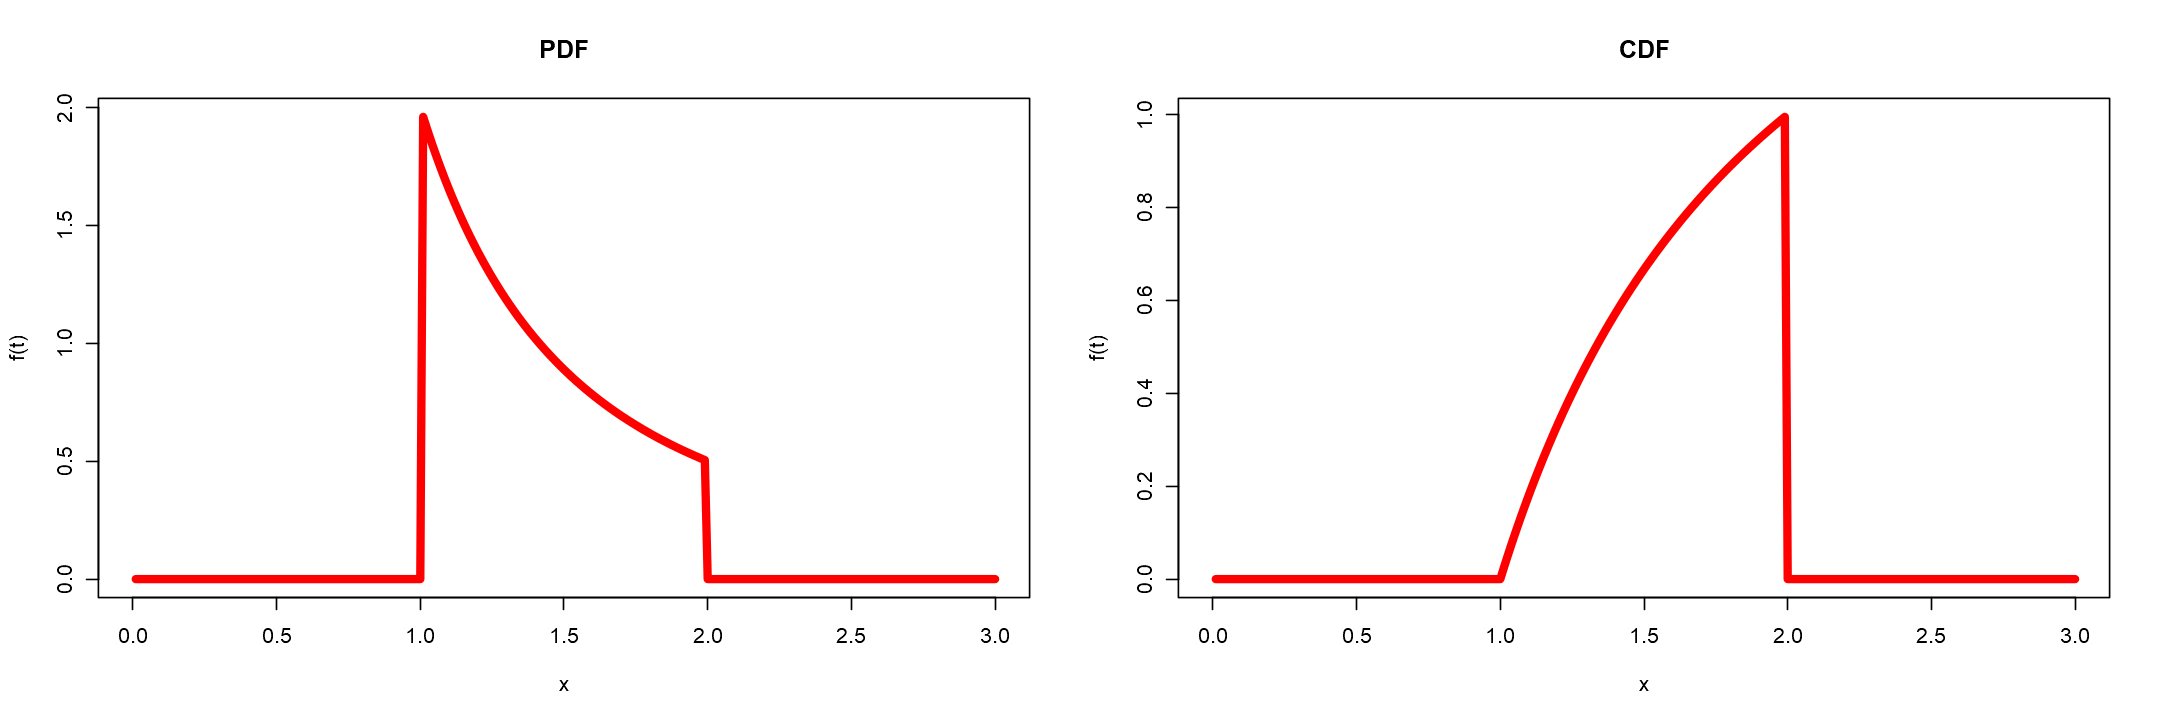

In [8]:
options(repr.plot.width=18, repr.plot.height=6);par(mfrow=c(1,2))
a=0;b=3;n=0.01
# A) write the set of four R functions and plot the pdf and cdf, respectively
# PDF
pdf<- Vectorize(function(x){(x <= 1)*(0)+(1 < x & x < 2)*(2/x^2)+(x>=2)*(0)})
plot1<-plot(seq(a,b,n),pdf(seq(a,b,n)), type = "l", col = "red",lwd = 5,xlab = "x", ylab = "f(t)", main = "PDF")

#CUMULATIVE
cfunc<- Vectorize(function(x){(x <= 1)*(0)+(1 < x & x < 2)*((-2/x)+2+(x>=2)*(0))})
plot2<-plot(seq(a,b,n),cfunc(seq(a,b,n)), type = "l", col = "red",lwd = 5,xlab = "x", ylab = "f(t)", main = "CDF")

# QUANTILE FUNCTION
qfunc<-Vectorize(function(a,b,n){quantile(seq(a,b,n),cfunc(seq(a,b,n)))})

#SAMPLING FROM THE DISTRIBUTION
sfunc<-function(n){
    x_seq<-seq(0.5,2.5,0.00001)
    x_pdf<-pdf(x_seq)
    sample(x=x_seq, size=n, prob = x_pdf)}


In [9]:
# B) 
print(paste0('The probability that the tires will last less than 15000 km is ', cfunc(1.5)))
# C) 
data<-sfunc(3000)
print(paste0("Mean value = ",mean(data)))
print(paste0("Variance = ",mean(data**2) - mean(data)**2))

[1] "The probability that the tires will last less than 15000 km is 0.666666666666667"
[1] "Mean value = 1.37970240666667"
[1] "Variance = 0.0772018149935412"
